In [1]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


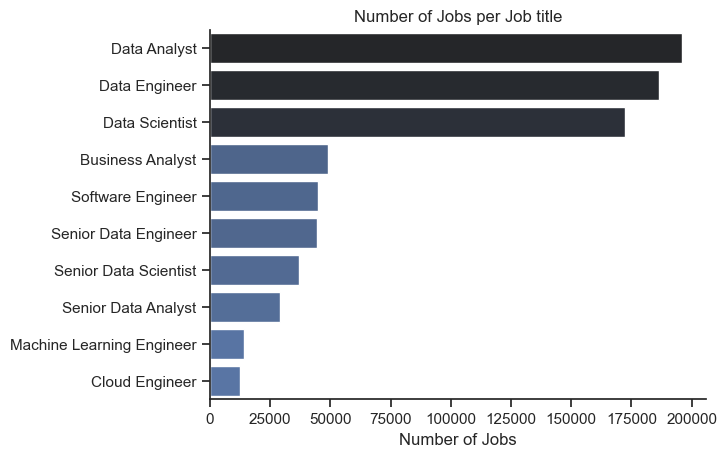

In [3]:
df_plot = df['job_title_short'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count' ,y='job_title_short',palette='dark:b_r',hue='count',legend=False)
sns.despine()
plt.xlabel('Number of Jobs')
plt.title('Number of Jobs per Job title')
plt.ylabel('')
plt.show()

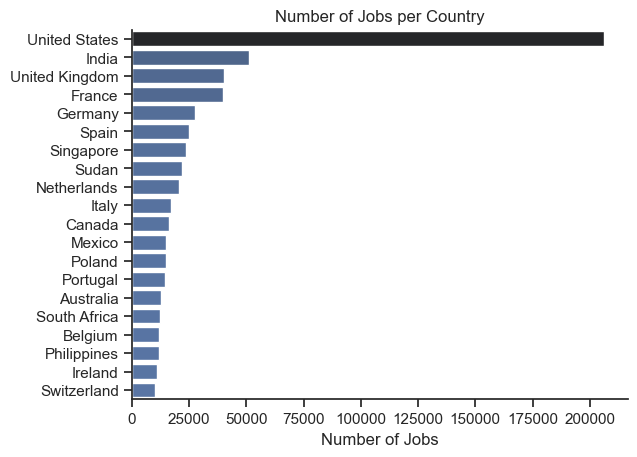

In [4]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count',y='job_country',palette='dark:b_r',hue='count',legend=False)
sns.despine() # remove line top and right

plt.title('Number of Jobs per Country')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

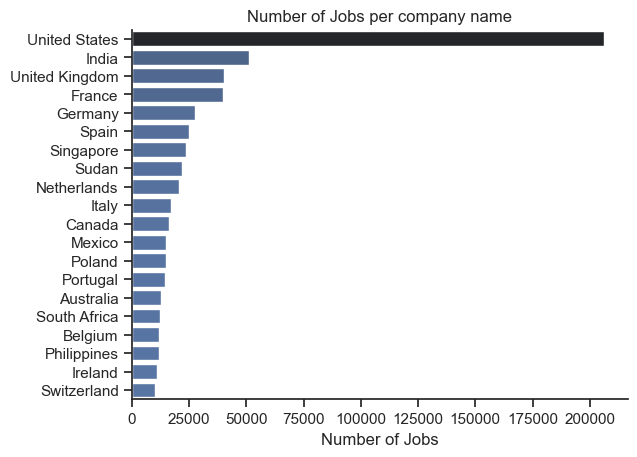

In [53]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_country',palette='dark:b_r',hue='count',legend=False)
sns.despine()


plt.title('Number of Jobs per company name')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

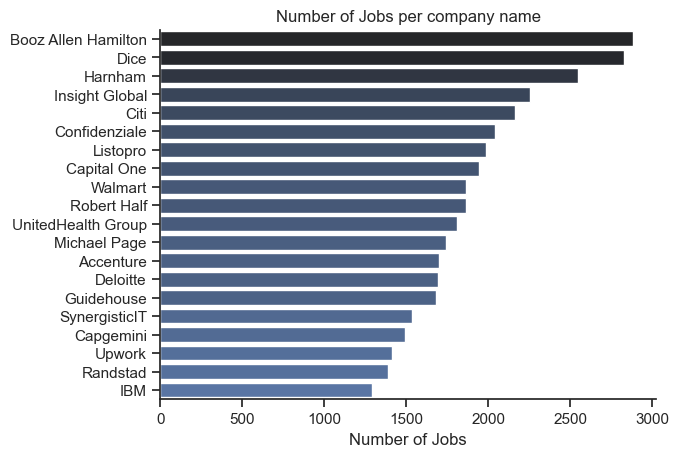

In [42]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)#ไม่เอาindex 1

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count', y='company_name',palette='dark:b_r',hue='count',legend=False)
sns.despine()

plt.title('Number of Jobs per company name')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [ ]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')& (df['job_country']== 'United States')].copy()

df_DA_US =df_DA_US.dropna(subset=['salary_year_avg'])

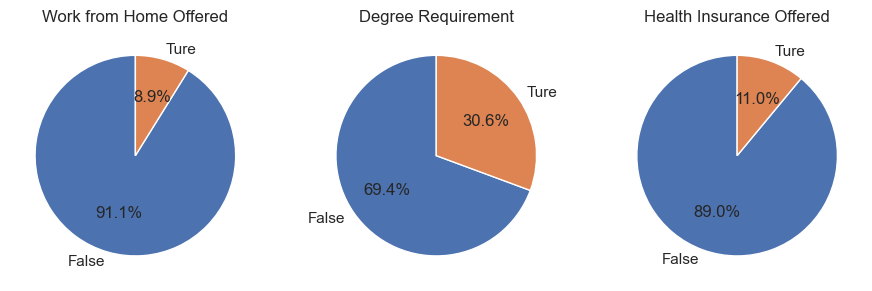

In [32]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig , ax = plt.subplots(1,3, figsize=(11,4))
for i , (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts() , labels=['False','Ture'],autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)


In [55]:
df_DA_US = df[(df['job_country']=='United States')& (df['job_title_short']=='Data Analyst')]

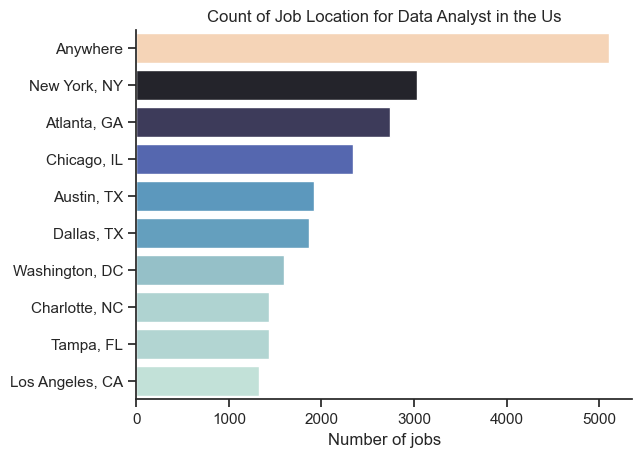

In [72]:
df_plot = df_DA_US['job_location'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',palette=('icefire'),hue='count',legend=False)
sns.despine()

plt.title('Count of Job Location for Data Analyst in the Us')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

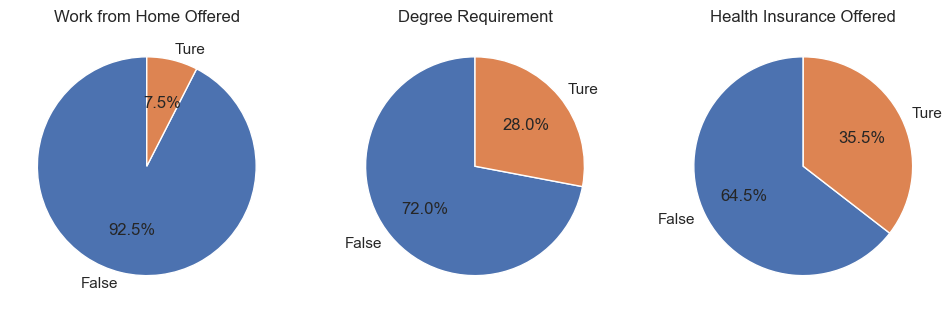

In [80]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig , ax = plt.subplots(1,3)
fig.set_size_inches((12,60))

for i ,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),labels=['False','Ture'],startangle=90,autopct='%1.1f%%')
    ax[i].set_title(title)
    
    

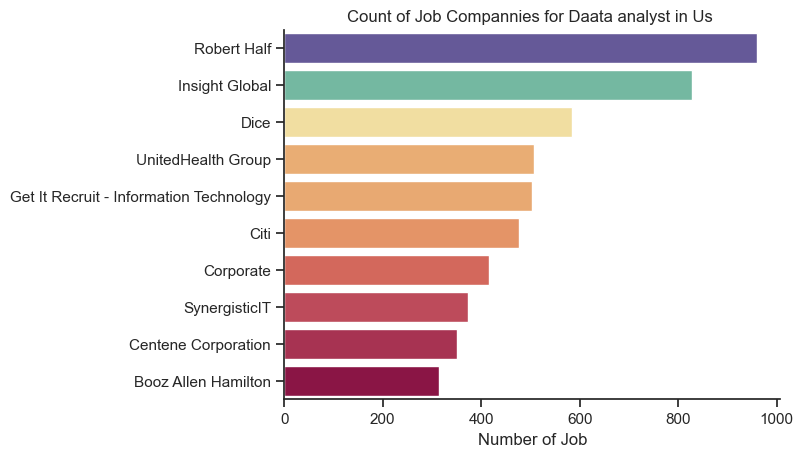

In [84]:
df_plot = df_DA_US['company_name'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',palette='Spectral',hue='count',legend=False)
sns.despine()

plt.title('Count of Job Compannies for Daata analyst in Us ')
plt.ylabel('')
plt.xlabel('Number of Job')
plt.show()